In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('/Users/brian/School/School.Compsci/CS124H Project/Group27-FA22/Project/Regression/big_ten_stats_df_2022')

In [3]:
y = np.array(df.pop('win_percentage'))

In [4]:



y = (torch.from_numpy(y)).type(torch.float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   abbreviation                            112 non-null    object 
 1   Year                                    112 non-null    object 
 2   assist_percentage                       112 non-null    float64
 3   assists                                 112 non-null    int64  
 4   away_losses                             112 non-null    int64  
 5   away_wins                               112 non-null    int64  
 6   block_percentage                        112 non-null    float64
 7   blocks                                  112 non-null    int64  
 8   conference                              112 non-null    object 
 9   conference_losses                       112 non-null    int64  
 10  conference_wins                         112 non-null    int64 

In [6]:
X = np.array(df[['free_throw_attempt_rate']])
X = torch.from_numpy(X).type(torch.float)


In [7]:
means = X.mean(1, keepdim=True)
deviations = X.std(1, keepdim=True)

In [8]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)



(89, 89, 23, 23)

In [9]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

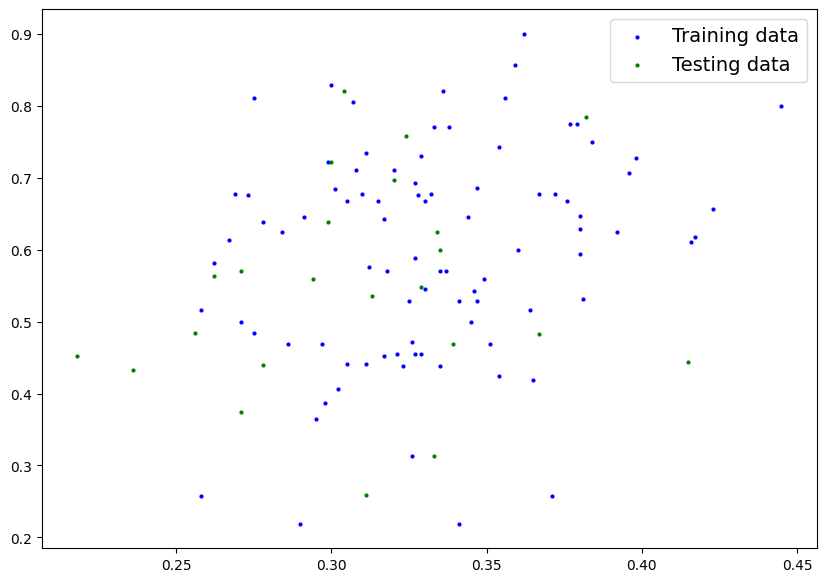

In [10]:
plot_predictions(X_train, y_train, X_test, y_test)

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1, out_features=1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [12]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

In [13]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):

    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.48906195163726807 | Test Loss: 0.5079540610313416
Epoch: 10 | Loss: 0.37800225615501404 | Test Loss: 0.3977010250091553
Epoch: 20 | Loss: 0.26894477009773254 | Test Loss: 0.2893563508987427
Epoch: 30 | Loss: 0.18308068811893463 | Test Loss: 0.20718243718147278
Epoch: 40 | Loss: 0.13857044279575348 | Test Loss: 0.1634169965982437
Epoch: 50 | Loss: 0.12493304163217545 | Test Loss: 0.1443941295146942
Epoch: 60 | Loss: 0.12180616706609726 | Test Loss: 0.13644534349441528
Epoch: 70 | Loss: 0.12095696479082108 | Test Loss: 0.13278916478157043
Epoch: 80 | Loss: 0.1206887811422348 | Test Loss: 0.13084904849529266
Epoch: 90 | Loss: 0.1205969825387001 | Test Loss: 0.12978112697601318
Epoch: 100 | Loss: 0.12056028097867966 | Test Loss: 0.12914593517780304
Epoch: 110 | Loss: 0.12054871022701263 | Test Loss: 0.12882229685783386
Epoch: 120 | Loss: 0.12054428458213806 | Test Loss: 0.12866325676441193
Epoch: 130 | Loss: 0.12054193019866943 | Test Loss: 0.12860165536403656
Epoch: 140

/Users/brian/opt/anaconda3/envs/CS124H/lib/python3.9/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([89])) that is different to the input size (torch.Size([89, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/Users/brian/opt/anaconda3/envs/CS124H/lib/python3.9/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([23])) that is different to the input size (torch.Size([23, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [14]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6164]])),
             ('linear_layer.bias', tensor([0.4102]))])

In [15]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)
y_preds, y_test

(tensor([[0.5772],
         [0.6031],
         [0.5976],
         [0.6660],
         [0.5772],
         [0.6130],
         [0.5815],
         [0.6364],
         [0.6019],
         [0.6099],
         [0.6074],
         [0.6457],
         [0.5951],
         [0.6161],
         [0.5717],
         [0.5945],
         [0.5914],
         [0.6167],
         [0.5680],
         [0.6191],
         [0.5446],
         [0.5557],
         [0.6154]]),
 tensor([0.5710, 0.5360, 0.8210, 0.4440, 0.3750, 0.5480, 0.4400, 0.4830, 0.2590,
         0.7580, 0.6970, 0.7840, 0.7220, 0.6250, 0.5630, 0.6390, 0.5590, 0.6000,
         0.4840, 0.4690, 0.4520, 0.4330, 0.3130]))

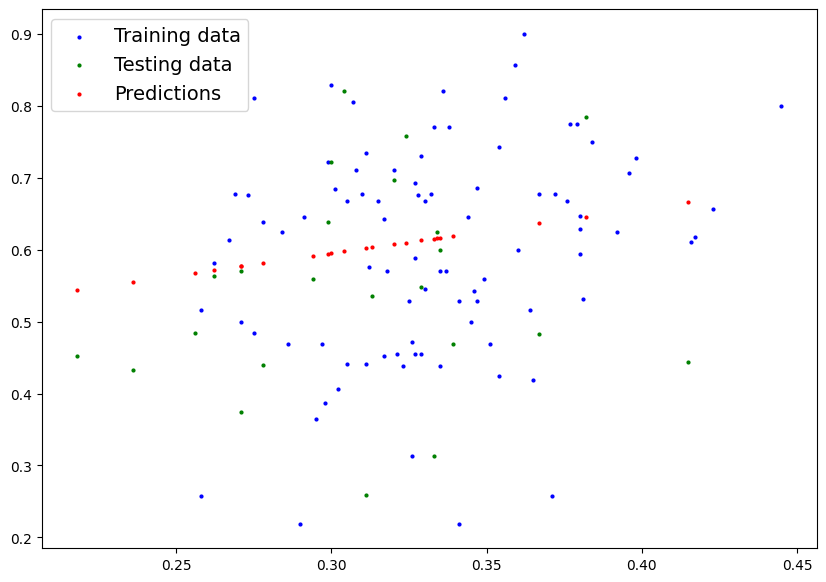

In [16]:
plot_predictions(predictions = y_preds)

In [17]:
mse = nn.MSELoss()

In [18]:
mse(y_preds, y_test)

/Users/brian/opt/anaconda3/envs/CS124H/lib/python3.9/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([23])) that is different to the input size (torch.Size([23, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0242)